<a href="https://colab.research.google.com/github/Angi03/time_series/blob/main/Seminar_3_4_Financial_econometrics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lecture 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
#link collab to data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x=pd.read_excel("/content/3_gdp_china.xlsx")

In [ ]:
x

,GDP
0,5234.8
1,6536.8
2,7122.5
3,8174.3
4,6803.1
...,...
99,211151.4
100,180385.3
101,200558.7
102,211595.5


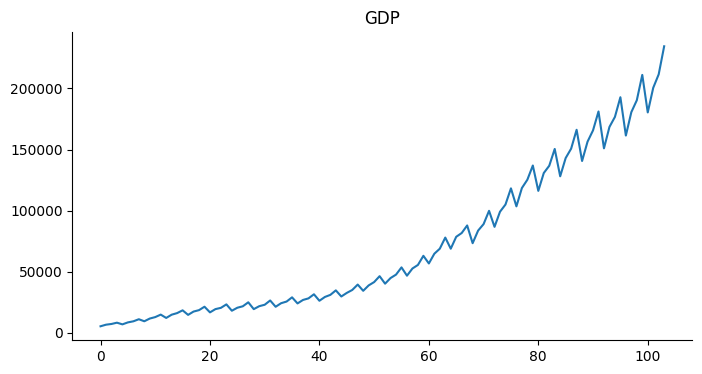

In [ ]:
# @title GDP

from matplotlib import pyplot as plt
x['GDP'].plot(kind='line', figsize=(8, 4), title='GDP')
plt.gca().spines[['top', 'right']].set_visible(False)

Stationarity test: One of the most important requirements for econometric modeling is that the time series data should be stationary, i.e., its mean and variance should remain constant over time. You can use the Augmented Dickey-Fuller (ADF) test to check for stationarity.

The ADF test returns the test statistic and p-value. You can interpret the results as follows:

If the p-value is less than 0.05, you can reject the null hypothesis of non-stationarity, and conclude that the time series is stationary.
If the p-value is greater than 0.05, you cannot reject the null hypothesis of non-stationarity, and conclude that the time series is non-stationary.

This line of code in Python uses the string formatting operator % to print a message that includes the value of a variable result[0].

The %f inside the string is a placeholder for a floating-point number, and it tells Python to format result[0] as a floating-point number and insert it in place of the %f in the string.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result_adf1 = adfuller(x['GDP'], regression='ctt')

# Print the test statistic and p-value
print('ADF Statistic: %f' % result_adf1[0])
print('p-value: %f' % result_adf1[1])

ADF Statistic: -3.310890
p-value: 0.168572


The KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test is a statistical test used to determine whether a time series is stationary or non-stationary. Stationarity is an important assumption in econometric modeling as it implies that the statistical properties of the time series remain constant over time. Non-stationary time series, on the other hand, exhibit trends, seasonal patterns, or other systematic variations that change over time.

The null hypothesis of the KPSS test is that the time series is stationary. The alternative hypothesis is that the time series is non-stationary. The test statistic is based on the cumulative sum of the deviations of the observed values from their expected values, under the null hypothesis of stationarity. The test statistic is compared to critical values to determine whether to reject or fail to reject the null hypothesis.

To perform the KPSS test in Python, you can use the statsmodels library. Here's an example code:

In [ ]:
# Perform the KPSS test
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
result_kpss1 = kpss(x['GDP'], regression='c')

# Extract the test statistic and p-value
test_statistic = result_kpss1[0]
p_value = result_kpss1[1]

# Print the test statistic and p-value
print('KPSS test statistic:', test_statistic)
print('p-value:', p_value)

# Interpret the result
if p_value < 0.05:
    print('Reject the null hypothesis: the time series is non-stationary.')
else:
    print('Fail to reject the null hypothesis: the time series is stationary.')


KPSS test statistic: 1.6839879465706784
p-value: 0.01
Reject the null hypothesis: the time series is non-stationary.


<ipython-input-26-5a88d157f31f>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss1 = kpss(x['GDP'], regression='c')


Seasonal decomposition is a common technique used in time series analysis to break down a time series into its constituent components, namely trend, seasonality, and residual (random) components. This technique is useful in identifying patterns and trends in the data and can be used to help build more accurate forecasting models.

The seasonal decomposition process involves separating the original time series into three components:

Trend: the long-term movement of the time series, which can be increasing, decreasing, or stable.
Seasonality: the periodic pattern of the time series, which can be daily, weekly, monthly, quarterly, or yearly.
Residual: the random and unexplained component of the time series that cannot be attributed to trend or seasonality.
There are several methods for performing seasonal decomposition, but the most commonly used is the additive or multiplicative method.

In the additive method, the time series is decomposed into the sum of the trend, seasonality, and residual components:

y(t) = Trend(t) + Seasonality(t) + Residual(t)

In the multiplicative method, the time series is decomposed into the product of the trend, seasonality, and residual components:

y(t) = Trend(t) x Seasonality(t) x Residual(t)

To perform seasonal decomposition in Python, you can use the seasonal_decompose function from the statsmodels library. Here's an example code:

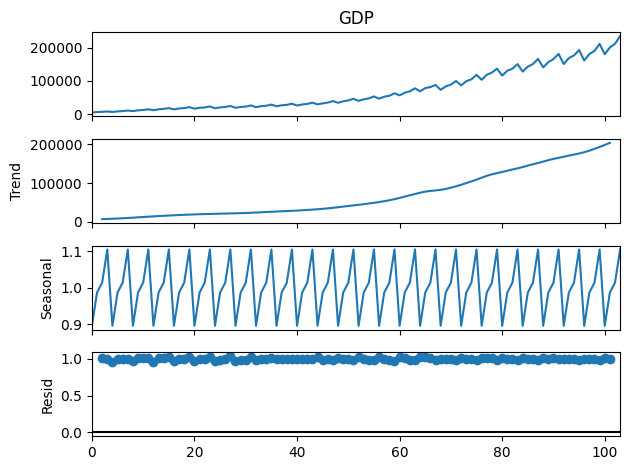

In [ ]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(x['GDP'], model='multiplicative', period=4)
decomposition.plot()
plt.show()

We perform seasonal decomposition on the time series using the seasonal_decompose function from the statsmodels library. The model parameter is set to 'additive' to indicate that the time series can be decomposed into additive components. The period parameter is set to 12 to indicate that the time series has a yearly seasonality.

We then extract the trend, seasonal, and residual components from the decomposition object and plot them using the plot method.

The resulting plot will show the original time series, the trend component, the seasonal component, and the residual component. By examining the components, we can gain insight into the underlying behavior of the time series, such as whether there is a trend or seasonality, and how strong these components are.

Moving average (MA) is a popular time series model used in forecasting future values of a time series based on its past values. It is a type of linear regression model that assumes the future values of a time series depend on its past values and a random error term. In this model, the random error term is modeled as a combination of the past error terms.

The MA model is represented as MA(q), where q is the order of the model, i.e., the number of past error terms included in the model. The model equation is given by:

y(t) = c + e(t) + θ1e(t-1) + θ2e(t-2) + ... + θqe(t-q)

where y(t) is the current value of the time series, c is the constant term, e(t) is the current error term, and θ1, θ2, ..., θq are the coefficients of the past error terms.

To build an MA model in Python, you can use the statsmodels library.

In this example, we first load the time series data from a CSV file. We then create an MA model using the ARIMA function from the statsmodels library, with the order parameter set to (0, 0, 1), indicating that we want to build an MA(1) model. We then fit the model to the data using the fit function and print the summary of the model using the summary function.

Note that you may need to adjust the order parameter based on the nature of the time series data and the results of the model diagnostics. Also, you may need to preprocess the data, such as removing trends and seasonality, before building the MA model.

In [ ]:
# Create the MA model
model_ma = sm.tsa.arima.ARIMA(x['GDP'], order=(0,0,1))

# Fit the model
results_ma = model_ma.fit()

# Print the summary of the model
print(results_ma.summary())

# Ypred = const + 0.74*l1.ma
# l1.ma is a residual from the previous period
# AIC = 2k - 2ln(L)
# AIC = 2*1 - 2* (-1263.588) =2529..

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  104
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1263.588
Date:                Thu, 13 Mar 2025   AIC                           2533.176
Time:                        15:34:09   BIC                           2541.109
Sample:                             0   HQIC                          2536.390
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.096e+04   1.77e+04      3.999      0.000    3.62e+04    1.06e+05
ma.L1          0.7400      0.171      4.339      0.000       0.406       1.074
sigma2      3.803e+09      0.146   2.61e+10      0.0

AIC, BIC, and HQIC are criteria used in selecting the best time series model. These criteria provide a way to compare different models and select the one that best fits the data while minimizing overfitting.

AIC stands for Akaike Information Criterion and is a measure of the goodness of fit of a model while penalizing for model complexity. It is calculated as:

AIC = 2k - 2ln(L)

where k is the number of parameters in the model and L is the likelihood function.

BIC stands for Bayesian Information Criterion and is similar to AIC, but with a stronger penalty for model complexity. It is calculated as:

BIC = kln(n) - 2ln(L)

where n is the sample size.

HQIC stands for Hannan-Quinn Information Criterion and is another measure of model selection. It is similar to AIC, but with a stronger penalty for the number of parameters. It is calculated as:

HQIC = 2kln(ln(n)) - 2ln(L)

In general, the lower the value of AIC, BIC, or HQIC, the better the model. However, the relative values of these criteria can provide additional insight into the trade-off between goodness of fit and model complexity. A model with a lower AIC may have better goodness of fit, while a model with a lower BIC or HQIC may have a better balance between goodness of fit and model complexity.

In practice, it is common to compare multiple models using AIC, BIC, and HQIC and select the model with the lowest value of any of these criteria.

Autoregressive (AR) is another popular time series model used in forecasting future values of a time series based on its past values. It is a type of linear regression model that assumes the future values of a time series depend on its past values and a random error term, where the past values are represented as a linear combination of the previous values of the time series.

The AR model is represented as AR(p), where p is the order of the model, i.e., the number of past values included in the model. The model equation is given by:

y(t) = c + φ1y(t-1) + φ2y(t-2) + ... + φpy(t-p) + e(t)

where y(t) is the current value of the time series, c is the constant term, φ1, φ2, ..., φp are the coefficients of the past values, and e(t) is the current error term.

To build an AR model in Python, you can use the statsmodels library.

In [ ]:
# Create the AR model
model_ar = sm.tsa.arima.ARIMA(x['GDP'], order=(1,0, 0))

# Fit the model
results_ar = model_ar.fit()

# Print the summary of the model
print(results_ar.summary())

# y=const(very close to zero)+0.9953*L1ar+error

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  104
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1112.783
Date:                Thu, 13 Mar 2025   AIC                           2231.567
Time:                        15:34:09   BIC                           2239.500
Sample:                             0   HQIC                          2234.780
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.096e+04   5.15e-10   1.38e+14      0.000     7.1e+04     7.1e+04
ar.L1          0.9953      0.009    111.986      0.000       0.978       1.013
sigma2      1.094e+08   1.53e-12   7.13e+19      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
# Create the ARMA model
model_arma = sm.tsa.arima.ARIMA(x['GDP'], order=(1,0,1))

# Fit the model
results_arma = model_arma.fit()

# Print the summary of the model
print(results_arma.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  104
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1103.430
Date:                Thu, 13 Mar 2025   AIC                           2214.861
Time:                        15:34:09   BIC                           2225.438
Sample:                             0   HQIC                          2219.146
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.096e+04   2.38e-09   2.98e+13      0.000     7.1e+04     7.1e+04
ar.L1          0.9987      0.004    259.783      0.000       0.991       1.006
ma.L1         -0.4092      0.063     -6.524      0.0

ARMA stands for Autoregressive Moving Average model. It is a statistical model used to represent the behavior of a time series data over time. An ARMA model consists of two components, an autoregressive (AR) component and a moving average (MA) component.

The autoregressive component in an ARMA model refers to the linear dependence of the current value of the time series on its past values. The degree of dependence is determined by the order of the AR component, denoted as p. A higher order indicates a stronger dependence on the past values. The equation for the AR component is:

yt = c + φ1yt-1 + φ2yt-2 + … + φpyt-p + εt

where yt is the current value of the time series, c is a constant, φ1 to φp are the coefficients of the autoregressive terms, and εt is a white noise error term.

The moving average component in an ARMA model refers to the linear dependence of the current value of the time series on its past error terms. The degree of dependence is determined by the order of the MA component, denoted as q. A higher order indicates a stronger dependence on the past errors. The equation for the MA component is:

yt = c + θ1εt-1 + θ2εt-2 + … + θqεt-q + εt

where θ1 to θq are the coefficients of the moving average terms.

The combined ARMA model can be written as:

yt = c + φ1yt-1 + φ2yt-2 + … + φpyt-p + θ1εt-1 + θ2εt-2 + … + θqεt-q + εt

where p and q are the orders of the AR and MA components respectively.

ARMA models are commonly used in time series analysis and forecasting. They are particularly useful when the time series exhibits both autoregressive and moving average properties. By estimating the coefficients of the ARMA model, we can forecast future values of the time series and analyze its behavior over time.

In [ ]:
# Create the ARIMA model
model_arima = sm.tsa.arima.ARIMA(x['GDP'], order=(1,1,1))

# Fit the model
results_arima = model_arima.fit()

# Print the summary of the model
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1089.902
Date:                Thu, 13 Mar 2025   AIC                           2185.805
Time:                        15:34:10   BIC                           2193.709
Sample:                             0   HQIC                          2189.006
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1667      0.241     -0.691      0.489      -0.639       0.306
ma.L1         -0.3078      0.203     -1.516      0.130      -0.706       0.090
sigma2      9.432e+07   1.37e-09    6.9e+16      0.0

In [ ]:
# Print the AIC, BIC, and HQIC values for each model
print('Model 1: AIC={}, BIC={}, HQIC={}'.format(results_ma.aic, results_ma.bic, results_ma.hqic))
print('Model 2: AIC={}, BIC={}, HQIC={}'.format(results_ar.aic, results_ar.bic, results_ar.hqic))
print('Model 3: AIC={}, BIC={}, HQIC={}'.format(results_arma.aic, results_arma.bic, results_arma.hqic))
print('Model 4: AIC={}, BIC={}, HQIC={}'.format(results_arima.aic, results_arima.bic, results_arima.hqic))

Model 1: AIC=2533.176277010173, BIC=2541.1094497075974, HQIC=2536.390238409583
Model 2: AIC=2231.5665140724477, BIC=2239.499686769872, HQIC=2234.7804754718577
Model 3: AIC=2214.860597156082, BIC=2225.4381607526475, HQIC=2219.145879021962
Model 4: AIC=2185.80468651268, BIC=2193.708873477369, HQIC=2189.0061528722317


In this example, we load a time series data into a Pandas DataFrame and calculate the ACF and PACF using the acf() and pacf() functions from the statsmodels.tsa.stattools module. We specify the maximum number of lags to consider using the nlags parameter.

We then create a subplot with two panels using the plt.subplot() function, and plot the ACF and PACF using the plt.stem() function. We set the x-axis label to "Lag", the y-axis label to "ACF" or "PACF", and set the title of each panel.

Finally, we display the plots using the plt.show() function.

Note that the ACF and PACF can help us determine the optimal number of lags for the autoregressive (AR) and moving average (MA) components of an ARMA model, as we discussed in a previous question. The ACF shows the correlation between a time series and its lagged values, while the PACF shows the correlation between a time series and its lagged values after accounting for the effects of all intermediate lags. We can use these plots to identify the significant lags and estimate the appropriate number of AR and MA lags for an ARMA

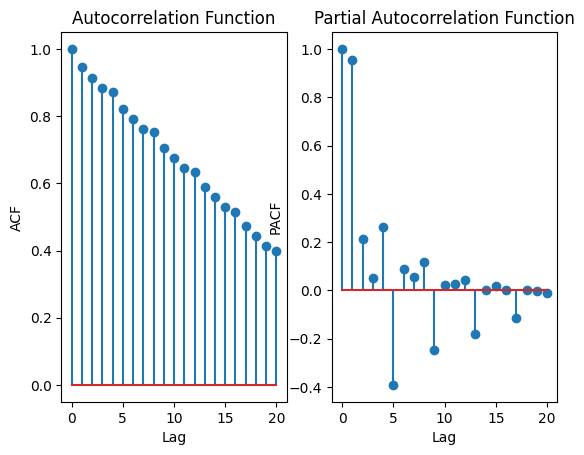

In [ ]:
# Calculate the ACF and PACF
acf_1 = sm.tsa.stattools.acf(x['GDP'].values, nlags=20)
pacf_1 = sm.tsa.stattools.pacf(x['GDP'].values, nlags=20)

# Plot the ACF
plt.subplot(121)
plt.stem(acf_1)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

# Plot the PACF
plt.subplot(122)
plt.stem(pacf_1)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')

# Display the plots
plt.show()

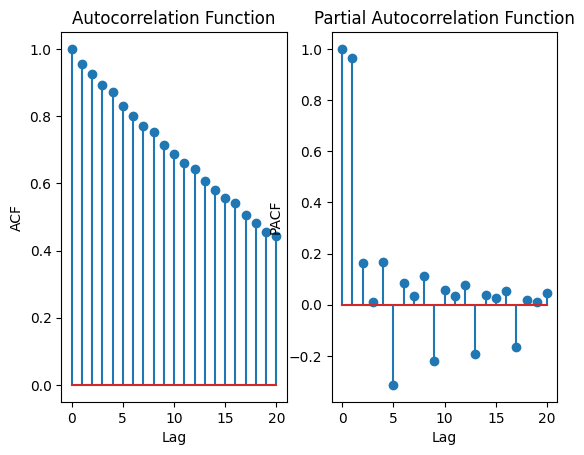

In [ ]:
logGDP = np.log(x)
logGDP
# Calculate the ACF and PACF
acf_2 = sm.tsa.stattools.acf(logGDP, nlags=20)
pacf_2 = sm.tsa.stattools.pacf(logGDP, nlags=20)

# Plot the ACF
plt.subplot(121)
plt.stem(acf_2)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

# Plot the PACF
plt.subplot(122)
plt.stem(pacf_2)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')

# Display the plots
plt.show()

In [ ]:
# Create the ARIMA model
model_arima2 = sm.tsa.arima.ARIMA(logGDP, order=(1,1,1))

# Fit the model
results_arima2 = model_arima2.fit()

# Print the summary of the model
print(results_arima2.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  70.724
Date:                Thu, 13 Mar 2025   AIC                           -135.448
Time:                        16:23:38   BIC                           -127.544
Sample:                             0   HQIC                          -132.246
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2577      0.277     -0.930      0.352      -0.801       0.286
ma.L1         -0.1598      0.251     -0.637      0.524      -0.651       0.332
sigma2         0.0148      0.004      3.457      0.0

In financial econometrics, log differencing is a common technique used to transform non-stationary financial time series into stationary ones. Stationarity is important in time series analysis because it allows for the use of many statistical models, which require the data to have constant mean, constant variance, and no trend or seasonality.

A non-stationary financial time series is one in which the mean, variance, or both are changing over time. For example, stock prices often exhibit trends, and their variance can be influenced by changes in market conditions or investor sentiment. Non-stationary series can lead to spurious results when used in time series analysis, such as incorrectly estimated parameters, invalid hypothesis tests, and unreliable forecasts.

Log differencing is a transformation that can be applied to a non-stationary time series to make it stationary. The procedure involves taking the logarithm of the original series and then taking the first difference of the resulting series. The first difference is defined as the difference between consecutive observations of the transformed series. The resulting series is often referred to as the log difference series.

The log transformation can help stabilize the variance of the series, while the first difference can help remove any trends that are present. The transformation can be applied iteratively until the resulting series is stationary. Once the series is stationary, a wide range of time series models can be used for forecasting and analysis.

In [ ]:
#Create new dataframe DlogGDP, which contains first difference of logGDP
DlogGDP = logGDP.diff()
DlogGDP

,GDP
0,NaN
1,0.222119
2,0.085811
3,0.137736
4,-0.183617
...,...
99,0.103644
100,-0.157480
101,0.106012
102,0.053569


<Axes: >

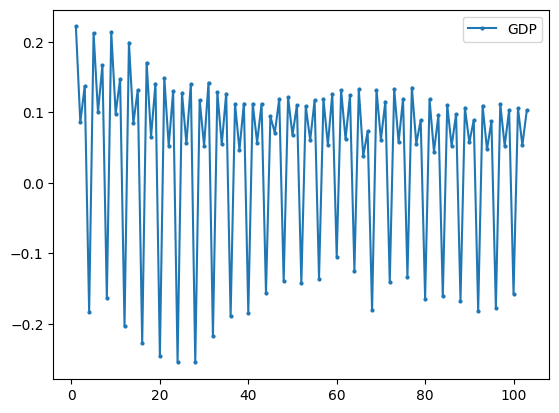

In [ ]:
DlogGDP.plot(marker = 'o', ms = 2)

In [ ]:
# Perform the KPSS test
result_kpss2 = kpss(DlogGDP.dropna(), regression='c')

# Extract the test statistic and p-value
test_statistic = result_kpss2[0]
p_value = result_kpss2[1]

# Print the test statistic and p-value
print('KPSS test statistic:', test_statistic)
print('p-value:', p_value)

# Interpret the result
if p_value < 0.05:
    print('Reject the null hypothesis: the time series is non-stationary.')
else:
    print('Fail to reject the null hypothesis: the time series is stationary.')

KPSS test statistic: 0.2277626051023581
p-value: 0.1
Fail to reject the null hypothesis: the time series is stationary.


<ipython-input-48-861c9b08f01f>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss2 = kpss(DlogGDP.dropna(), regression='c')


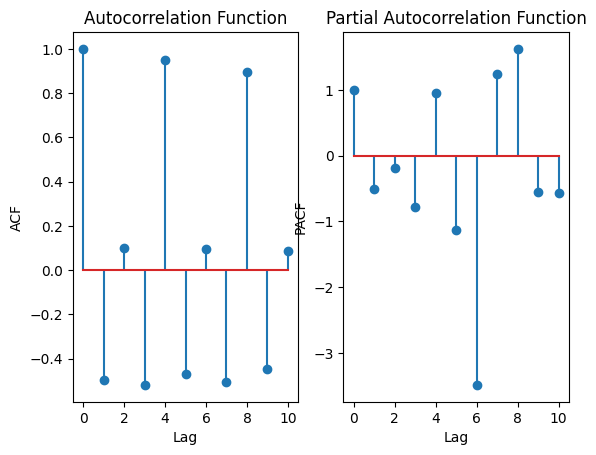

In [ ]:
# title Default title text
# Calculate the ACF and PACF
acf_3 = sm.tsa.stattools.acf(DlogGDP['GDP'].dropna(), nlags=10)
pacf_3 = sm.tsa.stattools.pacf(DlogGDP['GDP'].dropna(), nlags=10)



# Plot the ACF
plt.subplot(121)
plt.locator_params(axis='x', nbins=10)
plt.stem(acf_3)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

# Plot the PACF
plt.subplot(122)
plt.locator_params(axis='x', nbins=10)
plt.stem(pacf_3)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')

# Display the plots
plt.show()

This code performs model selection for an ARMA time series model using information criteria. Specifically, it uses the arma_order_select_ic() function from the statsmodels library to select the optimal ARMA(p,q) model order based on the Akaike information criterion (AIC), Bayesian information criterion (BIC), and Hannan-Quinn information criterion (HQIC).

The function takes the time series data DlogGDP as an input, along with the maximum orders for the autoregressive (AR) and moving average (MA) components (max_ar and max_ma, respectively), the list of information criteria to use (ic), and the trend component of the model (trend).

The inf variable stores the results of the model selection process, including the minimum AIC, BIC, and HQIC orders (inf.aic_min_order, inf.bic_min_order, inf.hqic_min_order).

The minimum AIC, BIC, and HQIC orders represent the optimal ARMA(p,q) model orders that minimize each respective information criterion. These orders can be used to fit an ARMA model to the time series data and to make predictions or forecasts.

In [ ]:
inf = sm.tsa.arma_order_select_ic(DlogGDP, max_ar = 10,
								max_ma = 10, ic = ['aic', 'bic', 'hqic'], trend = 'c')
print(inf.aic_min_order)
print(inf.bic_min_order)
print(inf.hqic_min_order)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Like

(10, 4)
(10, 4)
(10, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Create the ARIMA model
model_arima3 = sm.tsa.arima.ARIMA(DlogGDP, order=(4,0,4), enforce_stationarity=False)

# Fit the model
results_arima3 = model_arima3.fit()

# Print the summary of the model
print(results_arima3.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  104
Model:                 ARIMA(4, 0, 4)   Log Likelihood                 280.613
Date:                Thu, 13 Mar 2025   AIC                           -541.226
Time:                        16:33:38   BIC                           -515.275
Sample:                             0   HQIC                          -530.726
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0309      0.008      3.914      0.000       0.015       0.046
ar.L1         -0.0981      0.057     -1.729      0.084      -0.209       0.013
ar.L2         -0.1060      0.057     -1.868      0.0

100   -0.169347
101    0.110313
102    0.049855
103    0.101115
Name: predicted_mean, dtype: float64
          GDP
100 -0.157480
101  0.106012
102  0.053569
103  0.103130


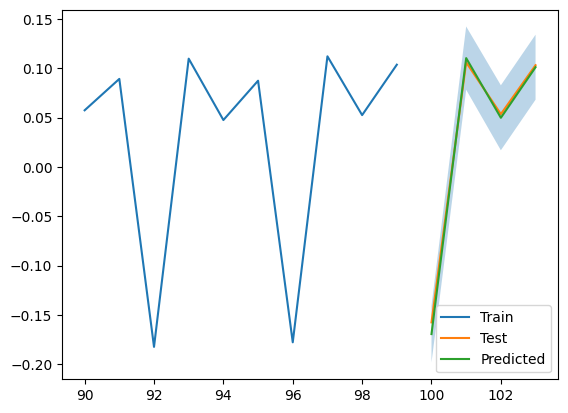

In [ ]:
#The variable train_data is assigned the values of the DlogGDP time series up to the fourth-to-last observation. This will be used to train an ARIMA model.
train_data = DlogGDP[:-4]
#The variable test_data is assigned the values of the last four observations of the DlogGDP time series. This will be used to test the ARIMA model's forecast accuracy.
test_data = DlogGDP[-4:]
#An ARIMA(5,0,0) model is defined using the SARIMAX() function from the statsmodels library, with train_data as the input and the (5,0,0) order specification for the ARIMA model. This model is then fitted to the training data using the fit() method of the ARIMAResults class.
model_arima4 = sm.tsa.SARIMAX(train_data, order=(4,0,4), enforce_stationarity=False)
results_arima4 = model_arima4.fit()
#The forecast() method of the ARIMAResults class is used to generate a 12-step ahead forecast of the DlogGDP time series. This forecast is stored in the variable forecast_arima4.
forecast_arima4 = results_arima4.forecast(steps=4)
#The forecast_arima4 and test_data variables are printed to the console to compare the predicted values with the actual values.
print(forecast_arima4)
print(test_data)
#The conf_int() method of the ARIMAResults class is used to compute the 95% confidence interval for the 12-step ahead forecast. This interval is stored in the variable forecast_ci.
forecast_ci = results_arima4.get_forecast(steps=4).conf_int()

#The code then generates a plot of the actual test data and the predicted values of the DlogGDP
#time series using the plot() function from the matplotlib library.
#The predicted values are plotted as a solid line, while the upper and lower bounds of the
#confidence interval are plotted as a shaded region using the fill_between() function.
plt.plot(train_data[-10:].index, train_data[-10:].values, label='Train')
plt.plot(test_data.index, test_data.values, label='Test')
plt.plot(forecast_arima4.index,forecast_arima4.values, label='Predicted')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.3)
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  100
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  67.279
Date:                Thu, 13 Mar 2025   AIC                           -130.558
Time:                        16:54:10   BIC                           -125.348
Sample:                             0   HQIC                          -128.450
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3926      0.102     -3.855      0.000      -0.592      -0.193
sigma2         0.0150      0.004      3.365      0.001       0.006       0.024
Ljung-Box (L1) (Q):                   3.81   Jarque-

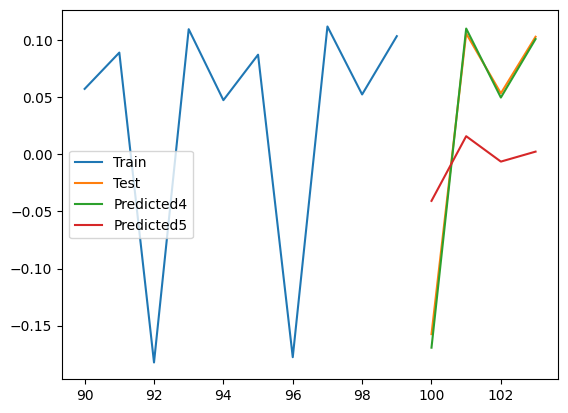

In [ ]:
model_arima5 = sm.tsa.SARIMAX(train_data, order=(1, 0, 0))
results_arima5 = model_arima5.fit()
print(results_arima5.summary())
#The forecast() method of the ARIMAResults class is used to generate a 12-step ahead forecast of the DlogGDP time series. This forecast is stored in the variable forecast_arima4.
forecast_arima5 = results_arima5.forecast(steps=4)
#The forecast_arima4 and test_data variables are printed to the console to compare the predicted values with the actual values.
print(forecast_arima5)
print(test_data)
#The conf_int() method of the ARIMAResults class is used to compute the 95% confidence interval for the 12-step ahead forecast. This interval is stored in the variable forecast_ci.
forecast_ci = results_arima5.get_forecast(steps=4).conf_int()

#The code then generates a plot of the actual test data and the predicted values of the DlogGDP
#time series using the plot() function from the matplotlib library.
#The predicted values are plotted as a solid line, while the upper and lower bounds of the
#confidence interval are plotted as a shaded region using the fill_between() function.
plt.plot(train_data[-10:].index, train_data[-10:].values, label='Train')
plt.plot(test_data.index, test_data.values, label='Test')
plt.plot(forecast_arima4.index,forecast_arima4.values, label='Predicted4')
plt.plot(forecast_arima5.index,forecast_arima5.values, label='Predicted5')
#plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.3)
plt.legend()
plt.show()

In [ ]:
print('Model 4 AIC: ', results_arima4.aic)
print('Model 4 BIC: ', results_arima4.bic)
print('Model 4 HQIC: ', results_arima4.hqic)
print('Model 5 AIC: ', results_arima5.aic)
print('Model 5 BIC: ', results_arima5.bic)
print('Model 5 HQIC: ', results_arima5.hqic)

Model 4 AIC:  -513.992947272835
Model 4 BIC:  -491.0080552484301
Model 4 HQIC:  -504.7053264563285
Model 5 AIC:  -130.55840089899982
Model 5 BIC:  -125.34806052702363
Model 5 HQIC:  -128.4496823957682


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.1 MB/s eta 0:00:00


In [ ]:
#Import pmarima API
import pmdarima as pm
train_data=DlogGDP
#use auto_arima in order to define number of lags;
#trace - track for status of fits; ignor errors; seasonality presented
model = pm.arima.auto_arima(train_data.dropna(),
                            trace=True,
                            error_action='ignore',
                            seasonal=True,
                            m=4,
                            suppress_warnings=True,
                            max_p=10,
                            max_q=10,
                            information_criterion='bic',
                            stepwise=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : BIC=-514.511, Time=4.30 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : BIC=-123.478, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[4] intercept   : BIC=inf, Time=0.85 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : BIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[4]             : BIC=-119.761, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[4] intercept   : BIC=inf, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[4] intercept   : BIC=-519.294, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[4] intercept   : BIC=inf, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,0)[4] intercept   : BIC=-518.083, Time=0.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,1)[4] intercept   : BIC=-513.491, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,0)[4] intercept   : BIC=-518.034, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,0)[4] intercept   : BIC=-525.341, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[4] intercept   : BIC=-158.911, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,0)[4] intercept   : BIC=-505.127, Time=0.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[4] intercept   : BIC=-504.020, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[4] intercept   : BIC=inf, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,1)[4] intercept   : BIC=-505.272, Time=0.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[4] intercept   : BIC=-523.325, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,0)[4] intercept   : BIC=inf, Time=0.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,0)[4] intercept   : BIC=-475.438, Time=3.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,0,0)[4] intercept   : BIC=inf, Time=1.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(1,0,0)[4] intercept   : BIC=-513.869, Time=0.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,0)[4]             : BIC=-529.907, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[4]             : BIC=-123.005, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,0)[4]             : BIC=-525.851, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[4]             : BIC=-525.735, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[4]             : BIC=inf, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,1)[4]             : BIC=-520.439, Time=0.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[4]             : BIC=-531.511, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[4]             : BIC=-127.544, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[4]             : BIC=-526.877, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[4]             : BIC=-516.988, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[4]             : BIC=inf, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[4]             : BIC=-522.550, Time=0.63 sec
 ARIMA(0,0,1)(1,0,0)[4]             : BIC=-530.977, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[4]             : BIC=inf, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,0)[4]             : BIC=-531.369, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[4]             : BIC=inf, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,0)[4]             : BIC=-534.419, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[4]             : BIC=-160.179, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,0,0)[4]             : BIC=-529.858, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,1)[4]             : BIC=-529.658, Time=0.30 sec
 ARIMA(0,0,2)(0,0,1)[4]             : BIC=inf, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,0,1)[4]             : BIC=-525.212, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,0,0)[4]             : BIC=-529.794, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(1,0,0)[4]             : BIC=-527.701, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,0)[4] intercept   : BIC=-529.875, Time=0.36 sec

Best model:  ARIMA(0,0,2)(1,0,0)[4]          
Total fit time: 26.923 seconds


ARIMA(0,0,2)(1,0,0)[4]

first part: (0,0,2)
here we use zero orders of AR, zero differencing, 2 lags of moving average
second part: (1,0,0)[4]
here we told that we have seasonality with order 4, meaning, for example, that value of China GDP in summer of 2017 depend on value of China GDP in summer of 2016. Order 1 means that we take seasonality with one lag. No seasonal difference and no moving averages from seasonality.

In [ ]:
model_arima6 = sm.tsa.SARIMAX(train_data, order=(0, 0, 2), seasonal_order=(1,0,0,4) )
results_arima6 = model_arima6.fit()
print(results_arima6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                GDP   No. Observations:                  100
Model:             SARIMAX(0, 0, 2)x(1, 0, [], 4)   Log Likelihood                 264.235
Date:                            Thu, 13 Mar 2025   AIC                           -520.470
Time:                                    16:54:25   BIC                           -510.050
Sample:                                         0   HQIC                          -516.253
                                            - 100                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4865      0.082      5.913      0.000       0.325       0.648
ma.L2          0.2815      0.102   

In [ ]:
print('Model 4 AIC: ', results_arima4.aic)
print('Model 4 BIC: ', results_arima4.bic)
print('Model 4 HQIC: ', results_arima4.hqic)
print('Model 5 AIC: ', results_arima5.aic)
print('Model 5 BIC: ', results_arima5.bic)
print('Model 5 HQIC: ', results_arima5.hqic)
print('Model 6 AIC: ', results_arima6.aic)
print('Model 6 BIC: ', results_arima6.bic)
print('Model 6 HQIC: ', results_arima6.hqic)

Model 4 AIC:  -513.992947272835
Model 4 BIC:  -491.0080552484301
Model 4 HQIC:  -504.7053264563285
Model 5 AIC:  -130.55840089899982
Model 5 BIC:  -125.34806052702363
Model 5 HQIC:  -128.4496823957682
Model 6 AIC:  -520.470306148551
Model 6 BIC:  -510.04962540459866
Model 6 HQIC:  -516.2528691420878


100   -0.168566
101    0.115884
102    0.052335
103    0.103194
Name: predicted_mean, dtype: float64
          GDP
100 -0.157480
101  0.106012
102  0.053569
103  0.103130


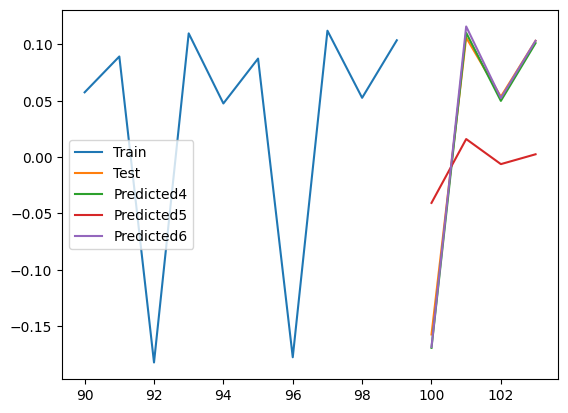

In [ ]:
#The forecast() method of the ARIMAResults class is used to generate a 12-step ahead forecast of the DlogGDP time series. This forecast is stored in the variable forecast_arima4.
forecast_arima6 = results_arima6.forecast(steps=4)
#The forecast_arima4 and test_data variables are printed to the console to compare the predicted values with the actual values.
print(forecast_arima6)
print(test_data)
#The conf_int() method of the ARIMAResults class is used to compute the 95% confidence interval for the 12-step ahead forecast. This interval is stored in the variable forecast_ci.
forecast_ci = results_arima6.get_forecast(steps=4).conf_int()

#The code then generates a plot of the actual test data and the predicted values of the DlogGDP
#time series using the plot() function from the matplotlib library.
#The predicted values are plotted as a solid line, while the upper and lower bounds of the
#confidence interval are plotted as a shaded region using the fill_between() function.
plt.plot(train_data[-10:].index, train_data[-10:].values, label='Train')
plt.plot(test_data.index, test_data.values, label='Test')
plt.plot(forecast_arima4.index,forecast_arima4.values, label='Predicted4')
plt.plot(forecast_arima5.index,forecast_arima5.values, label='Predicted5')
plt.plot(forecast_arima6.index,forecast_arima6.values, label='Predicted6')
#plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.3)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
model4_rmse=np.sqrt(mean_squared_error(test_data, forecast_arima4))
print("RMSE: ", model4_rmse)

RMSE:  0.006655202531569404


In [ ]:
from sklearn.metrics import mean_squared_error
model5_rmse=np.sqrt(mean_squared_error(test_data, forecast_arima5))
print("RMSE: ", model5_rmse)

RMSE:  0.0941539050793516


In [ ]:
from sklearn.metrics import mean_squared_error
model6_rmse=np.sqrt(mean_squared_error(test_data, forecast_arima6))
print("RMSE: ", model6_rmse)

RMSE:  0.007447675316907952


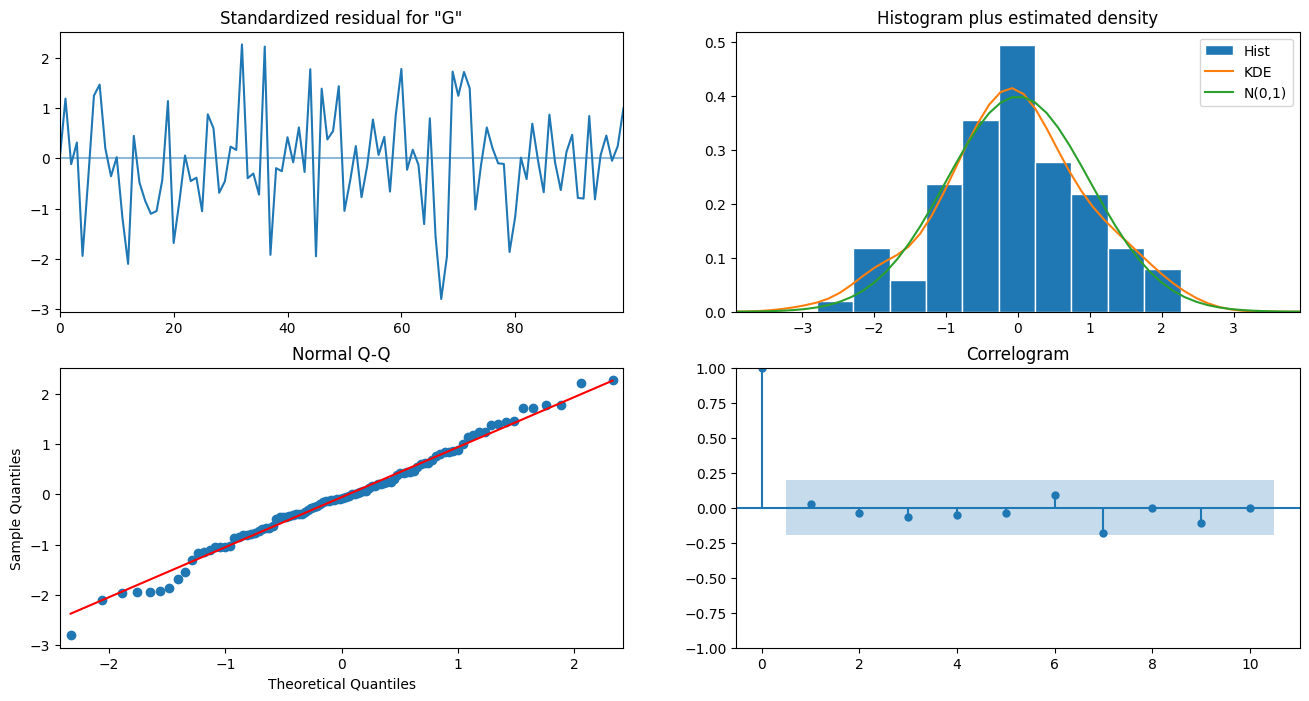

In [ ]:
results_arima6.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 12.3 MB/s eta 0:00:00


In [ ]:
x['ds']=x.index
x

,GDP,ds
0,5234.8,0
1,6536.8,1
2,7122.5,2
3,8174.3,3
4,6803.1,4
...,...,...
99,211151.4,99
100,180385.3,100
101,200558.7,101
102,211595.5,102


In [ ]:
x=x.rename(columns={'GDP': 'y'})
x

,y,ds
0,5234.8,0
1,6536.8,1
2,7122.5,2
3,8174.3,3
4,6803.1,4
...,...,...
99,211151.4,99
100,180385.3,100
101,200558.7,101
102,211595.5,102


In [ ]:
x['unique_id']='1'
x

,y,ds,unique_id
0,5234.8,0,1
1,6536.8,1,1
2,7122.5,2,1
3,8174.3,3,1
4,6803.1,4,1
...,...,...,...
99,211151.4,99,1
100,180385.3,100,1
101,200558.7,101,1
102,211595.5,102,1


In [ ]:
from statsforecast import StatsForecast

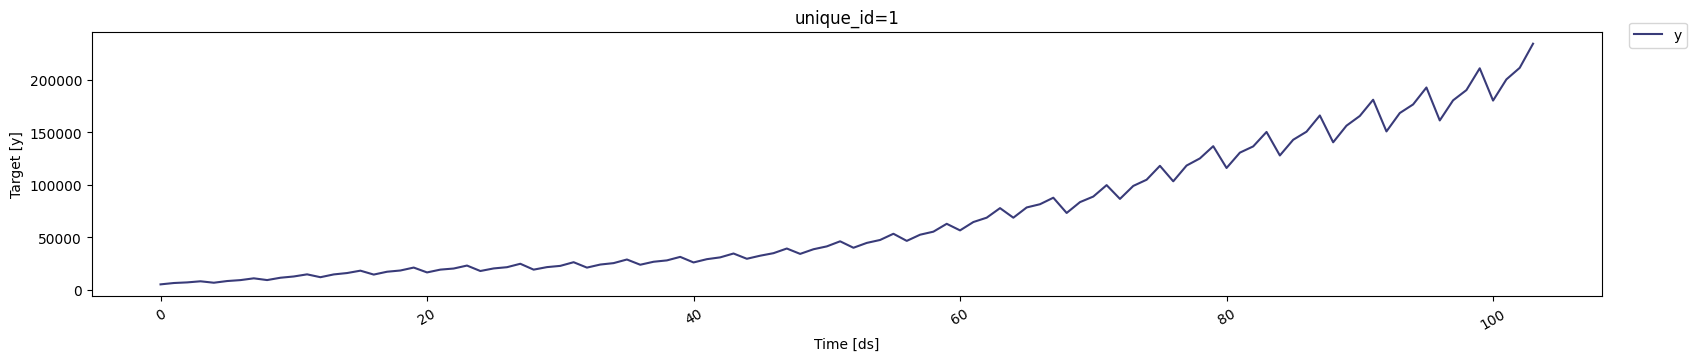

In [ ]:
StatsForecast.plot(x)

In [ ]:
from statsforecast.models import (
    AutoETS,
    HoltWinters,
    AutoARIMA,
    SeasonalNaive,
    DynamicOptimizedTheta)

In [ ]:
models=[AutoETS(season_length=4),
    HoltWinters(season_length=4),
    AutoARIMA(max_p=10,
            max_q=10, d=0),
    SeasonalNaive(season_length=4),
    DynamicOptimizedTheta(season_length=4)]

In [ ]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    models=models,
    freq=1,
    fallback_model = SeasonalNaive(season_length=4),
    n_jobs=-1,
)

In [ ]:
forecasts_df = sf.forecast(df=x, h=12, level=[95])
round(forecasts_df,2)

,unique_id,ds,AutoETS,AutoETS-lo-95,AutoETS-hi-95,HoltWinters,HoltWinters-lo-95,HoltWinters-hi-95,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-hi-95,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-95,DynamicOptimizedTheta-hi-95
0,1,104,201883.08,191832.41,211933.75,200491.68,192132.00,208851.36,222242.74,203300.72,241184.76,180385.3,160798.88,199971.72,191878.82,189366.95,194870.40
1,1,105,220913.45,209906.53,231920.37,218992.09,210028.97,227955.21,222093.04,200100.90,244085.17,200558.7,180972.28,220145.12,213290.94,208582.81,217700.71
2,1,106,230141.55,218640.06,241643.05,229311.52,219723.82,238899.21,221943.44,197278.89,246607.98,211595.5,192009.08,231181.92,221180.90,214828.95,226806.87
3,1,107,251505.66,238868.01,264143.30,251151.61,240919.24,261383.99,221793.93,194722.59,248865.27,234582.2,214995.78,254168.62,243173.44,235983.15,250299.90
4,1,108,216239.36,200699.45,231779.26,214725.00,203828.73,225621.28,221644.53,192366.43,250922.64,180385.3,152685.92,208084.68,198936.20,191953.07,205482.60
5,1,109,235269.73,218179.94,252359.51,233225.42,221646.81,244804.02,221495.23,190168.08,252822.38,200558.7,172859.32,228258.08,221144.84,213353.97,228794.29
6,1,110,244497.83,226507.95,262487.71,243544.84,231266.18,255823.50,221346.03,188098.39,254593.68,211595.5,183896.12,239294.88,229329.24,219602.65,236987.90
7,1,111,265861.94,246053.17,285670.70,265384.94,252389.11,278380.76,221196.94,186136.22,256257.66,234582.2,206882.82,262281.58,252130.84,241148.75,262577.31
8,1,112,230595.63,208956.81,252234.46,228958.33,215228.79,242687.87,221047.94,184265.66,257830.21,180385.3,146460.62,214309.98,206259.10,197204.30,215033.61
9,1,113,249626.00,225836.66,273415.35,247458.74,232979.44,261938.04,220899.04,182474.43,259323.65,200558.7,166634.02,234483.38,229275.57,219018.77,239303.25


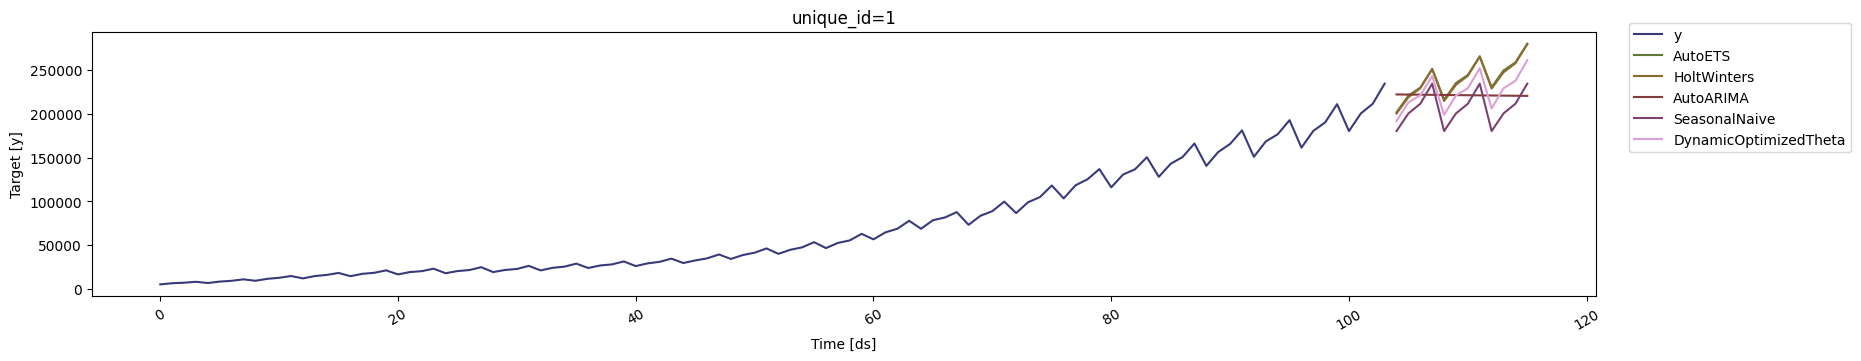

In [ ]:
sf.plot(x,forecasts_df)

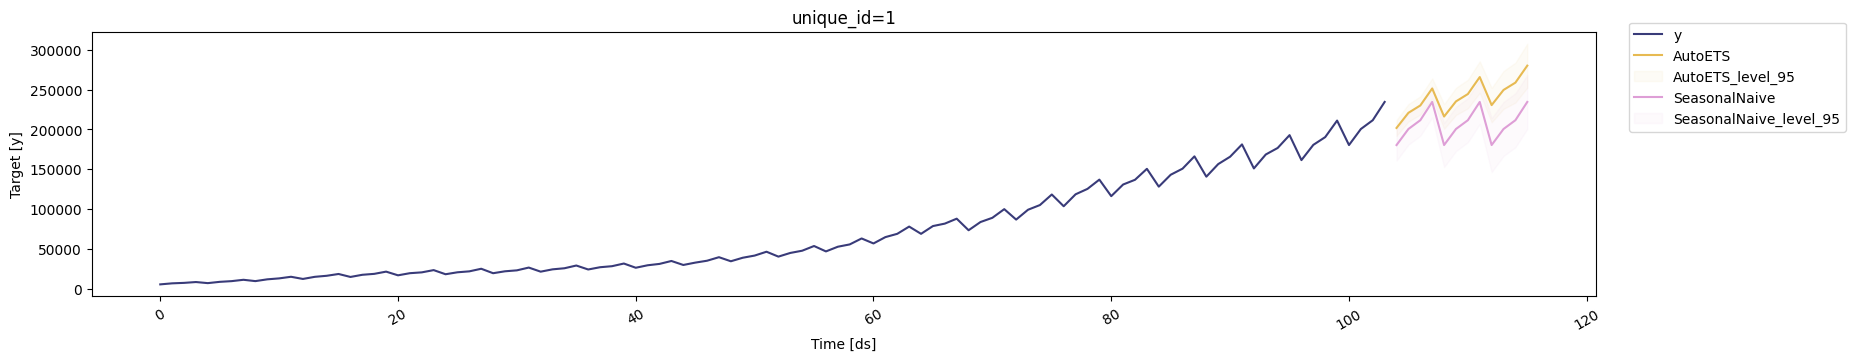

In [ ]:
# Plot to unique_ids and some selected models
sf.plot(x, forecasts_df, models=["AutoETS","SeasonalNaive"],
        unique_ids=["1"], level=[95])

In [ ]:
cv_df = sf.cross_validation(
    df=x,
    h=12,
    step_size=24,
    n_windows=2
)

In [ ]:
cv_df

,unique_id,ds,cutoff,y,AutoETS,HoltWinters,AutoARIMA,SeasonalNaive,DynamicOptimizedTheta
0,1,68,67,73283.6,77320.985397,77154.559246,85656.315182,68778.4,71241.631617
1,1,69,67,83614.2,87610.441936,87380.358100,85552.521959,78537.6,79743.749205
2,1,70,67,88923.5,88436.886851,88212.196098,85448.854507,81619.5,82938.136466
3,1,71,67,99808.0,93922.162940,93547.976414,85345.312673,87816.3,92194.319289
4,1,72,67,86684.3,84338.173363,83823.430683,85241.896305,68778.4,74790.440568
5,1,73,67,99059.8,94627.629901,94049.229537,85138.605251,78537.6,83732.680290
6,1,74,67,104950.6,95454.074817,94881.067535,85035.439359,81619.5,87097.459267
7,1,75,67,118208.2,100939.350906,100216.847851,84932.398477,87816.3,96823.099699
8,1,76,67,103456.9,91355.361328,90492.302120,84829.482453,68778.4,78545.043459
9,1,77,67,118465.0,101644.817867,100718.100974,84726.691138,78537.6,87931.191993


In [ ]:
from utilsforecast.losses import rmse

In [ ]:
def evaluate_cv(df, metric):
    models = df.columns.drop(['unique_id', 'ds', 'y', 'cutoff']).tolist()
    evals = metric(df, models=models)
    evals['best_model'] = evals[models].idxmin(axis=1)
    return evals

In [ ]:
evaluation_df = evaluate_cv(cv_df, rmse)
evaluation_df.head()

,unique_id,AutoETS,HoltWinters,AutoARIMA,SeasonalNaive,DynamicOptimizedTheta,best_model
0,1,10541.149053,11045.330028,26674.688267,29638.992449,18574.762416,AutoETS


In [ ]:
evaluation_df['best_model'].value_counts().to_frame().reset_index()

,best_model,count
0,AutoETS,1


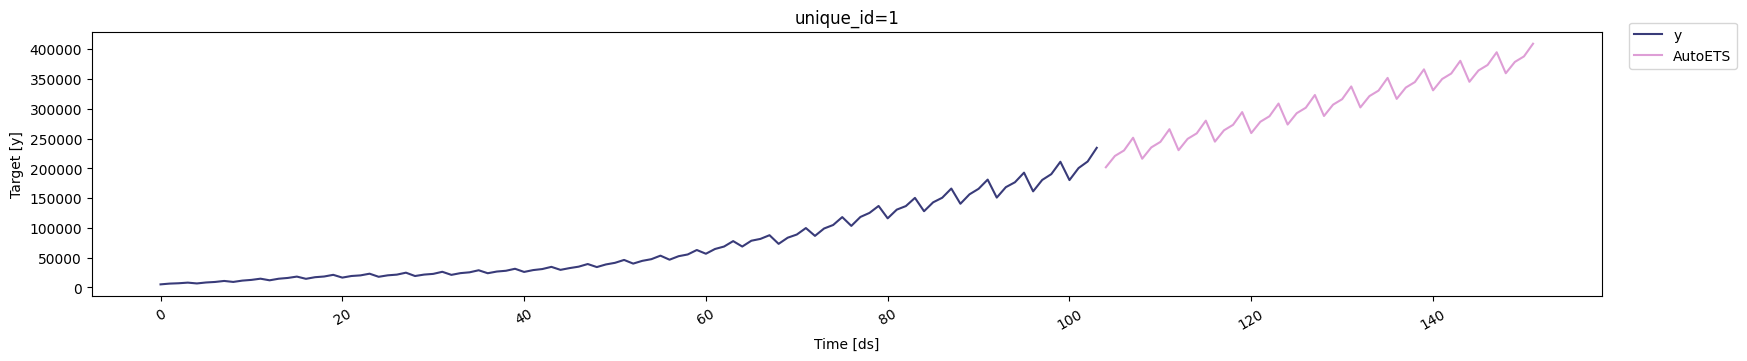

In [ ]:
seasonal_ids = evaluation_df.query('best_model == "AutoETS"')['unique_id']
sf.plot(x,forecasts_df, unique_ids=seasonal_ids, models=["AutoETS"])